# Exploring mseed file organization
- understand how data is currently stored on iris
- figure out how to handle time coordinate

In [1]:
import obspy
import numpy as np
from matplotlib import pyplot as plt
import xarray as xr

In [3]:
stream = obspy.read('TA.miniseed')

In [23]:
for tr in stream:
    tr.stats.sampling_rate = 200

In [27]:
print(stream.__str__(extended=True))

24 Trace(s) in Stream:
OO.AXEC2..HDH | 2018-01-01T00:00:00.000000Z - 2018-01-04T11:46:39.985000Z | 200.0 Hz, 60319998 samples
OO.AXEC2..HDH | 2018-01-04T11:47:46.470000Z - 2018-01-05T08:16:59.615000Z | 200.0 Hz, 14750630 samples
OO.AXEC2..HDH | 2018-01-05T08:17:49.360000Z - 2018-01-05T15:49:38.815000Z | 200.0 Hz, 5421892 samples
OO.AXEC2..HDH | 2018-01-05T15:50:40.780000Z - 2018-01-05T22:17:39.995000Z | 200.0 Hz, 4643844 samples
OO.AXEC2..HDH | 2018-01-05T22:18:33.160000Z - 2018-01-06T15:46:56.355000Z | 200.0 Hz, 12580640 samples
OO.AXEC2..HDH | 2018-01-06T15:48:17.060000Z - 2018-01-06T23:17:06.545000Z | 200.0 Hz, 5385898 samples
OO.AXEC2..HDH | 2018-01-06T23:17:36.080000Z - 2018-01-08T19:46:45.695000Z | 200.0 Hz, 32029924 samples
OO.AXEC2..HDH | 2018-01-08T19:47:45.390000Z - 2018-01-09T06:17:05.565000Z | 200.0 Hz, 7552036 samples
OO.AXEC2..HDH | 2018-01-09T06:17:57.460000Z - 2018-01-12T23:45:53.435000Z | 200.0 Hz, 64415196 samples
OO.AXEC2..HDH | 2018-01-12T23:47:17.390000Z - 2018-01-

In [30]:
trace = stream.merge()[0]

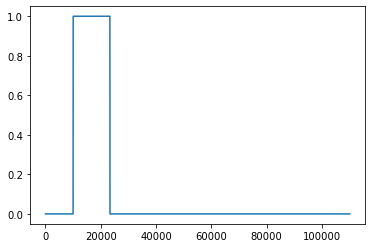

In [40]:
plt.plot(trace.data.mask[60319998-10000:60319998+100000])

In [45]:
idx = np.argmax(trace.data.mask)

In [ ]:
trace.data[idx-10:idx+10].filled(fill_value=np.nan)

In [60]:
xr.DataArray(trace.data[idx-10:idx+10]).values.dtype

dtype('float64')

In [62]:
trace.data.data[idx-10:idx+10]

array([     -27261,      -27081,      -27074,      -27062,      -27053,
            -27143,      -27334,      -27343,      -27258,      -27089,
       -2147483648, -2147483648, -2147483648, -2147483648, -2147483648,
       -2147483648, -2147483648, -2147483648, -2147483648, -2147483648], dtype=int32)

In [63]:
trace.data.mask.dtype

dtype('bool')

In [64]:
np.max(trace.data)

-1120

In [65]:
np.min(trace.data)

-50982

In [66]:
trace

OO.AXEC2..HDH | 2018-01-01T00:00:00.000000Z - 2018-01-30T21:13:23.585000Z | 200.0 Hz, 516400718 samples (masked)

In [75]:
from obspy.io.xseed.core import _read_resp
resp = _read_resp('/Users/jhrag/Downloads/RESP.AXEC2.OO.HDH.resp')

In [77]:
type(resp)

obspy.core.inventory.inventory.Inventory

In [83]:
resp.plot_response()

TypeError: plot_response() missing 1 required positional argument: 'min_freq'